In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scout import io
from scout import detection
from scout import score
from scout import plot
from scout.utils import read_json, filter_points_in_box

In [40]:
%matplotlib inline

In [41]:
parent_dir = '/media/jswaney/SSD EVO 860/organoid_phenotyping'
folder_name = '20190430_11_36_09_AA-4.30.19-org1_488LP12p5_561LP120_642LP50'
working_dir = os.path.join(parent_dir, folder_name)
os.listdir(working_dir)

['points_roi2.json.2019-05-23_19-00-46',
 'syto_roi1.tif',
 'nuclei_segmentations.npz',
 'points_roi1.json',
 'nuclei_foreground.zarr',
 'points_roi2.json.2019-05-23_18-44-07',
 'points_roi2.json.2019-05-23_18-51-58',
 'niche_sample_index.npy',
 'nuclei_binary.zarr',
 'points_roi2.json.2019-05-23_18-49-36',
 'Ex0_rescaled.tif',
 'sox2.zarr',
 'niche_proximities_sample.npy',
 'nuclei_morphologies.csv',
 'points_roi2.json.2019-05-23_19-46-07',
 'centroids_um.npy',
 'points_roi1.json.2019-05-22_19-48-28',
 'points_roi2.json.2019-05-23_18-44-12',
 'fluorescence',
 'points_roi2.json.2019-05-22_21-01-10',
 'points_roi2.json.2019-05-23_18-58-38',
 'tbr1.zarr',
 'points_roi2.json.2019-05-22_20-57-33',
 'points_roi2.json.2019-05-23_18-47-03',
 'syto_roi2.tif',
 'voxel_size.csv',
 'points_roi2.json.2019-05-22_20-10-55',
 'points_roi2.json.2019-05-23_19-01-38',
 'points_roi2.json.2019-05-23_19-47-31',
 'points_roi2.json.2019-05-22_20-10-20',
 'nuclei_probability.zarr',
 'points_roi2.json.2019-05-

# Load ROI

In [42]:
image = io.imread(os.path.join(working_dir, 'syto_roi2.tif'))

image.shape

(52, 140, 140)

# Load ground truth

In [44]:
gt_data = read_json(os.path.join(working_dir, 'points_roi2.json'))
gt_data = np.asarray(gt_data)
centroids_gt = gt_data[:, ::-1]
centroids_gt.shape

(728, 3)

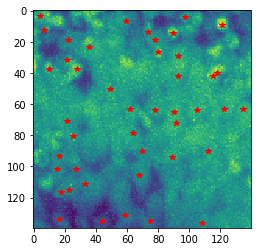

In [45]:
plot.zprojection(image, centroids_gt, zlim=[20, 25])

# Detect nuclei

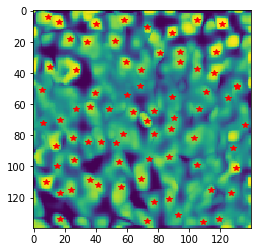

(616, 3)

In [62]:
prob = detection.nucleus_probability(image, 
                                     sigma=(1.0, 3.0, 3.0), 
                                     steepness=1500, 
                                     offset=-0.0005, 
                                     I0=1, 
                                     stdev=0.06)

centroids_det = detection.nuclei_centers_probability(prob,
                                                     threshold=0.2,
                                                     min_dist=3)

plot.zprojection(prob, centroids_det, zlim=[20, 25])
centroids_det.shape

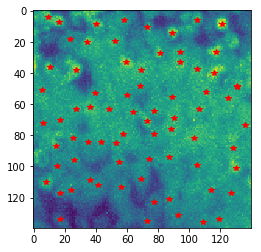

In [63]:
plot.zprojection(image, centroids_det, zlim=[20, 25])

# Calculate detection accuracy

In [64]:
max_distance = 10

start = np.asarray((10, 6, 6))
stop = start + np.asarray((32, 128, 128))

centroids_det_sub = filter_points_in_box(centroids_det, start, stop)
centroids_gt_sub = filter_points_in_box(centroids_gt, start, stop)

result = score.score_centroids(centroids_det_sub, 
                               centroids_gt_sub, 
                               max_distance)
precision = result.precision
recall = result.recall
f_score = result.f_score

# result = score.score_centroids(centroids_det_sub, 
#                                centroids_gt, 
#                                max_distance)
# precision = result.precision
# result = score.score_centroids(centroids_det, 
#                                centroids_gt_sub, 
#                                max_distance)
# recall = result.recall

# f_score = 2 / (1 / precision + 1 / recall)

precision, recall, f_score

(0.8363171355498721, 0.856020942408377, 0.8460543337645537)